# <code style="color : Green">Solving a System of 3 Linear Equations in 3 Unknowns</code>

We want to visualize the solution of a linear system $Ax = b$, where:

- $A$ is a 3×3 matrix representing coefficients
- $b$ is a vector of constants
- $x$ is the vector of unknowns $[x, y, z]$

The goal is to find the point in 3D space where all three planes defined by the equations intersect.


### The System:

$$
\begin{aligned}
x + 2y + 3z &= 6 \\
2x + 5y + 2z &= 4 \\
6x - 3y + z &= 2
\end{aligned}
$$

We are solving for values of $x, y, z$ that satisfy all three equations at once.
Since we have 3 equations and 3 unknowns, there is typically a unique solution (when the matrix is invertible).

---

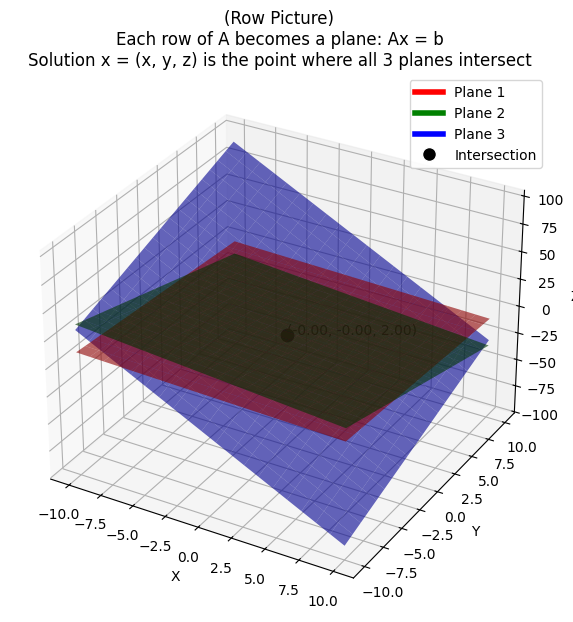

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Define A and b
A = np.array([[1, 2, 3],
              [2, 5, 2],
              [6, -3, 1]])

b = np.array([6, 4, 2])

# Solve for intersection point
intersection = np.linalg.solve(A, b)
x0, y0, z0 = intersection

# Create 3D grid
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_vals, y_vals)

def plane_z(a, b, c, d):
    return (d - a * X - b * Y) / c

# Plot setup
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']
labels = ['Plane 1', 'Plane 2', 'Plane 3']

# Plot each plane
for i in range(3):
    a, b_, c = A[i]
    d = b[i]
    Z = plane_z(a, b_, c, d)
    ax.plot_surface(X, Y, Z, alpha=0.6, color=colors[i])

# Plot the intersection point
ax.scatter(x0, y0, z0, color='black', s=80, label='Intersection Point')
ax.text(x0, y0, z0 + 1, f'({x0:.2f}, {y0:.2f}, {z0:.2f})', color='black')

# Axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('(Row Picture)\nEach row of A becomes a plane: Ax = b\nSolution x = (x, y, z) is the point where all 3 planes intersect')

# Custom legend
legend_elements = [Line2D([0], [0], color=colors[i], lw=4, label=labels[i]) for i in range(3)]
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Intersection',
                              markerfacecolor='black', markersize=10))
ax.legend(handles=legend_elements)

plt.show()

## <code style="color : Orange">Interpretation (Row Picture View)</code>

* Each plane shown in the 3D plot represents one **linear equation** from the system $Ax = b$. These equations come from the **rows of $A$**.
* The **black dot** marks the **unique point** where all three planes intersect — this is the **solution vector** $x = (x, y, z)$.
* This point satisfies **all three equations** simultaneously, which is why it represents the solution to the system.

In this case, the solution is:

$$
x = (0, 0, 2)
$$

Why?
Because when you plug this vector into the equation $Ax = b$, it satisfies all three equations:

$$
A \cdot x = b \Rightarrow 
\begin{bmatrix}
1 & 2 & 3 \\
2 & 5 & 2 \\
6 & -3 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
0 \\
0 \\
2
\end{bmatrix}
=
\begin{bmatrix}
6 \\
4 \\
2
\end{bmatrix}
$$

* Algebraically, the system is **consistent**.
* Geometrically, this means the **three planes intersect at a single point** — and that point is exactly $(0, 0, 2)$.

---

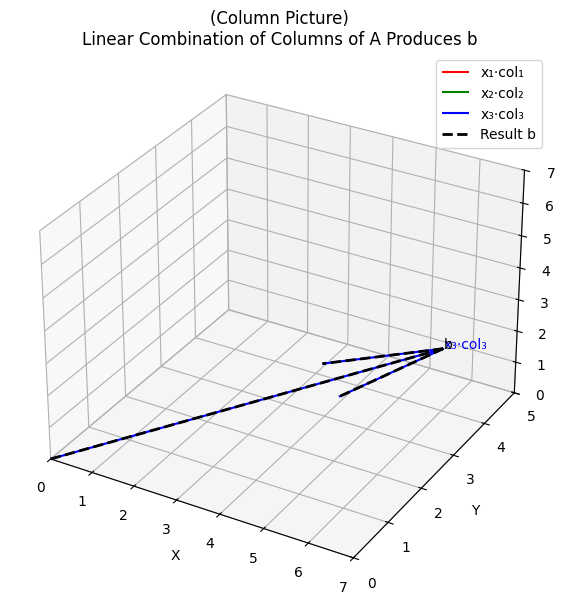

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define A and b
A = np.array([[1, 2, 3],
              [2, 5, 2],
              [6, -3, 1]])

b = np.array([6, 4, 2])

# Solve for x in Ax = b
x = np.linalg.solve(A, b)

# Get the columns of A
col1 = A[:, 0]
col2 = A[:, 1]
col3 = A[:, 2]

# Scaled columns by x
v1 = x[0] * col1
v2 = x[1] * col2
v3 = x[2] * col3

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot origin
origin = np.array([0, 0, 0])

# Plot scaled column vectors
ax.quiver(*origin, *v1, color='red', label='x₁·col₁')
ax.quiver(*v1, *(v2), color='green', label='x₂·col₂')
ax.quiver(*(v1 + v2), *(v3), color='blue', label='x₃·col₃')

# Plot resulting vector b
ax.quiver(*origin, *b, color='black', linestyle='dashed', linewidth=2, label='Result b')

# Annotate vectors
ax.text(*v3, 'x₃·col₃', color='blue')
ax.text(*b, 'b', color='black')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('(Column Picture)\nLinear Combination of Columns of A Produces b')

# Set legend and limits
ax.legend()
ax.set_xlim([0, 7])
ax.set_ylim([0, 5])
ax.set_zlim([0, 7])

plt.show()

## <code style="color : Orange">Interpretation: Column Picture of $Ax = b$</code>

* In the **column picture**, the matrix equation $Ax = b$ means:
  the vector $b$ is a **linear combination** of the **columns of $A$**.
* Each column of $A$ is a vector in 3D space.
* The solution vector $x = (0, 0, 2)$ tells us how to **scale and add** the columns of $A$ to reach $b$:

  $$
  Ax = x_1 \cdot \text{col}_1 + x_2 \cdot \text{col}_2 + x_3 \cdot \text{col}_3 = b
  $$

* In this specific case:

  * $x_1 = 0$, so column 1 contributes **nothing**
  * $x_2 = 0$, so column 2 also contributes **nothing**
  * $x_3 = 2$, so **only the third column** is used — scaled by 2

**Geometric Meaning**

* The black arrow (vector $b$) is reached by scaling the third column vector by 2.
* This confirms that $b$ lies in the **span of the columns of $A$**.
* The visualization shows each scaled column as an arrow, drawn tip-to-tail to show how they add up to form $b$.

---

#  <code style="color : Green">Unified Insight: Row Picture vs Column Picture</code>

**here's how they fit together:**

* In the **Row Picture**, we look at each linear equation as a **plane** in 3D.
  The point where all three planes **intersect** is the solution vector $x = (x, y, z)$.
  This is where all the equations are **simultaneously satisfied**.

* In the **Column Picture**, we see the equation $Ax = b$ as asking:
  “How can we build the vector $b$ using a combination of the column vectors of $A$?”
  The answer $x = (0, 0, 2)$ tells us how much of each column is needed to **reach** $b$.

### Big Picture

* Both pictures describe the **same equation** $Ax = b$, but from different angles:

  * **Row picture**: Constraints — where solutions **must satisfy** the equations (planes intersecting).
  * **Column picture**: Construction — how $x$ **builds** the target vector $b$ from the available directions (columns of $A$).

* Together, they give a full geometric and algebraic understanding:

  * The solution $x$ is the point of intersection **in row space**,
  * and the recipe to construct $b$ **in column space**.


This synthesis is especially powerful when solving systems or studying vector spaces — it shows **what the solution is**, and **why it works**.